# Portfolio Optimization Using Python

This project applies data science techniques to solve a fundamental financial problem: how to allocate capital across multiple assets to optimize performance.

Built using Python, it focuses on four large-cap equities — AMD, AAPL, MSFT, and ORCL — to explore return profiles, risk exposure, and optimal portfolio construction.

The objective - use historical data and statistical modeling to derive actionable insights, balancing return and volatility through metrics like the Sharpe Ratio.

In [3]:
# Import packages needed for case study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('mode.chained_assignment', None)

In [4]:
# List the four stock ticker symbols for our portfolio
stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL']

# Create an empty dictionary to store our stock info
stocks = {}

# Loop through each stock in the stock_list
for i_stock in stock_list:
    stocks[i_stock] = pd.read_csv(str(i_stock + '.csv'), parse_dates=True, index_col = 'Date')

In [5]:
# Examine the 'AMD' Adj Close from the stocks dictionary
stocks['AMD'].head()

,Adj Close
Date,
2019-01-02,18.830000
2019-01-03,17.049999
2019-01-04,19.000000
2019-01-07,20.570000
2019-01-08,20.750000


In [6]:
# Create 'Normalized Return' column for each stock
for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close']  # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close

## Constructing an Equal-Weighted Portfolio

Each stock is given 25% of a $10,000 portfolio.

We calculate:
- **Normalized Return**: Scales all stocks to start at 1  
- **Allocation**: 25% × Normalized Return  
- **Position Value**: Allocation × 10,000

This shows how each position grows under a simple constant-weight strategy.

In [19]:
# Create 'Normalized Return' column for each stock
for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close

In [20]:
stocks['AAPL'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2019-01-02,38.047047,1.000000,0.250000,2500.000000
2019-01-03,34.257271,0.900392,0.225098,2250.980945
2019-01-04,35.719696,0.938830,0.234707,2347.074161
2019-01-07,35.640198,0.936740,0.234185,2341.850477
2019-01-08,36.319611,0.954597,0.238649,2386.493420


In [21]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stocks.items():
    stock_data['Allocation'] = stock_data['Normalized Return'] * 0.25

In [22]:
stocks['MSFT'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2019-01-02,96.632668,1.000000,0.250000,2500.000000
2019-01-03,93.077728,0.963212,0.240803,2408.029568
2019-01-04,97.406723,1.008010,0.252003,2520.025720
2019-01-07,97.530945,1.009296,0.252324,2523.239483
2019-01-08,98.238113,1.016614,0.254153,2541.534760


In [23]:
# Set the value of the portfolio to $10k
for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000

In [24]:
stocks['ORCL'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2019-01-02,42.138145,1.000000,0.250000,2500.000000
2019-01-03,41.728134,0.990270,0.247567,2475.674577
2019-01-04,43.526596,1.032950,0.258237,2582.374925
2019-01-07,44.216164,1.049314,0.262329,2623.286049
2019-01-08,44.616867,1.058824,0.264706,2647.059250


## Visualizing Portfolio Performance

We isolate the position value of each stock to track how individual holdings and the overall portfolio evolve over time.

In [25]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [26]:
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)
position_values.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000
2019-01-03,2263.674895,2250.980945,2408.029568,2475.674577
2019-01-04,2522.570377,2347.074161,2520.025720,2582.374925
2019-01-07,2731.014309,2341.850477,2523.239483,2623.286049
2019-01-08,2754.912385,2386.493420,2541.534760,2647.059250


In [27]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

In [28]:
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2019-01-03,2263.674895,2250.980945,2408.029568,2475.674577,9398.359984
2019-01-04,2522.570377,2347.074161,2520.025720,2582.374925,9972.045182
2019-01-07,2731.014309,2341.850477,2523.239483,2623.286049,10219.390319
2019-01-08,2754.912385,2386.493420,2541.534760,2647.059250,10329.999814


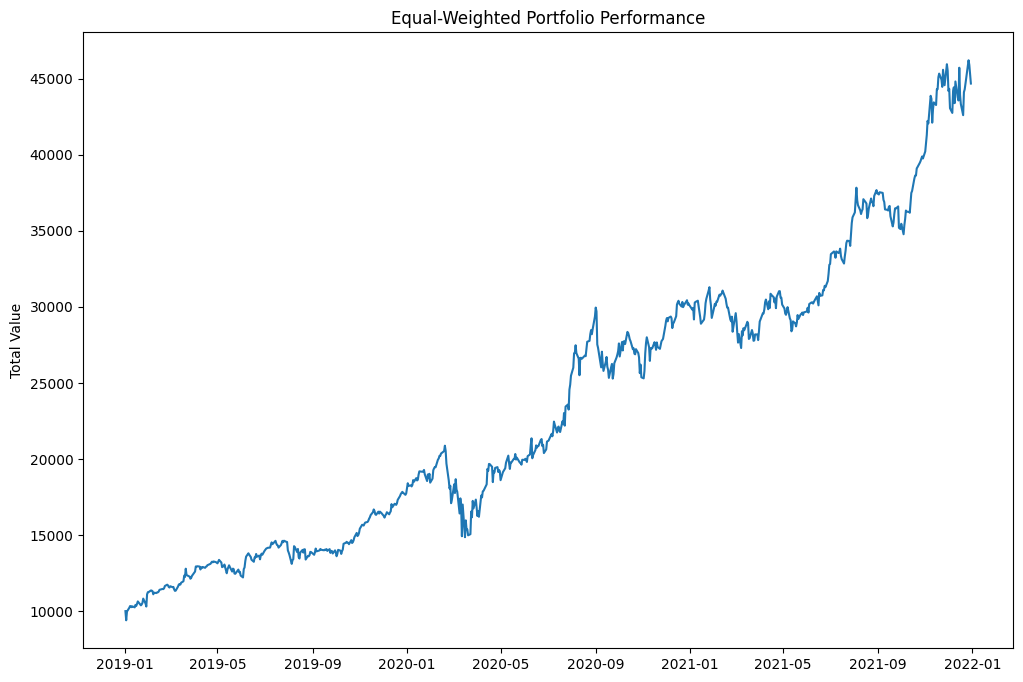

In [29]:
# View the total portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values['Total'])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value');

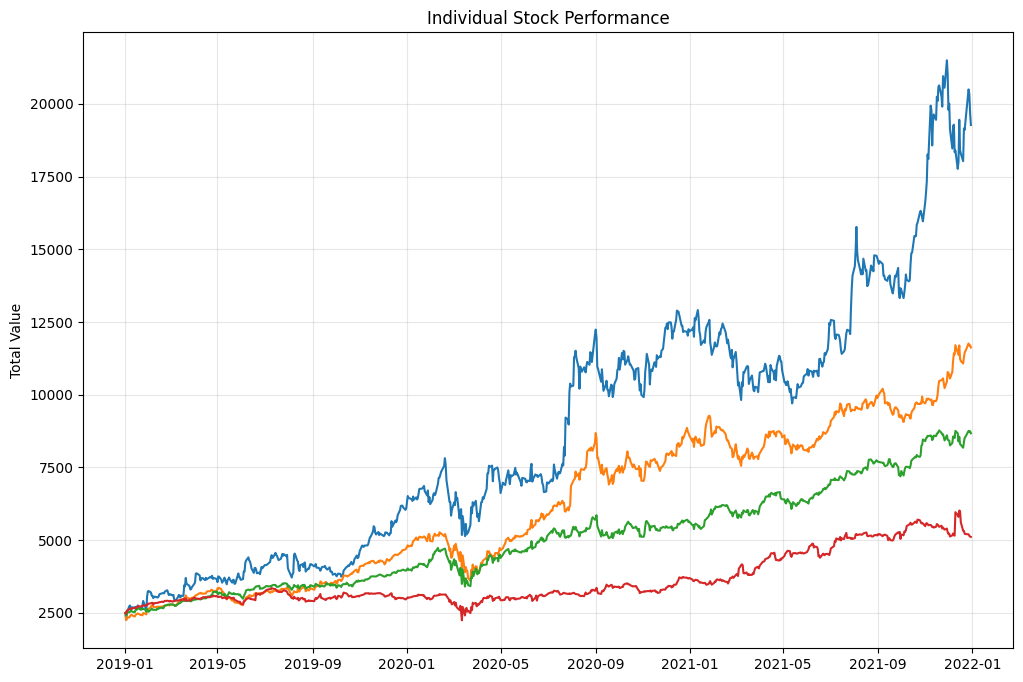

In [31]:
# View the four stocks in the portfolio
plt.figure(figsize=(12,8))

plt.plot(position_values.iloc[:, :4])
plt.title('Individual Stock Performance')
plt.ylabel('Total Value')
#plt.legend()  #  legend to identify each line
plt.grid(True, alpha=0.3)  #  grid for better readability

## Calculating Portfolio Performance Metrics

With the equal-weighted portfolio in place, we now evaluate performance using the following metrics:

- **Cumulative Return**  
- **Mean Daily Return**  
- **Daily Volatility (Standard Deviation)**  
- **Sharpe Ratio**  
- **Annualized Sharpe Ratio**

These provide a clearer view of risk-adjusted returns and overall portfolio efficiency.

In [32]:
# Define the end and start value of the portfolio
end_value = position_values['Total'].iloc[-1]
start_value = position_values['Total'].iloc[0]

# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print(cumulative_return)

3.4683655744152855


In [33]:
# Create a 'Daily Returns' column
position_values['Daily Returns'] = position_values['Total'].pct_change()

position_values.head()

,AMD,AAPL,MSFT,ORCL,Total,Daily Returns
Date,,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2019-01-03,2263.674895,2250.980945,2408.029568,2475.674577,9398.359984,-0.060164
2019-01-04,2522.570377,2347.074161,2520.025720,2582.374925,9972.045182,0.061041
2019-01-07,2731.014309,2341.850477,2523.239483,2623.286049,10219.390319,0.024804
2019-01-08,2754.912385,2386.493420,2541.534760,2647.059250,10329.999814,0.010823


In [34]:
# Calculate the mean Daily Return 
mean_daily_return = position_values['Daily Returns'].mean()

print('The mean daily return is: ', str(mean_daily_return))

The mean daily return is:  0.0021983344295164395


In [35]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Returns'].std()

print('The std daily return is:', str(std_daily_return))

The std daily return is: 0.020678297369836972


## Sharpe Ratio

The Sharpe Ratio measures return relative to risk, helping compare investment efficiency across assets or portfolios.

It's calculated as:  
**Sharpe Ratio = Mean Return / Standard Deviation of Return**

Assuming a near-zero risk-free rate, we omit it for simplicity. A higher Sharpe Ratio indicates better risk-adjusted performance.

In [36]:
# Calculate the sharpe ratio
sharpe_ratio = mean_daily_return/std_daily_return
float(sharpe_ratio)

0.10631119140027007

In [37]:
# Calculate the annualized sharpe ratio
# sharp ratio * sqr root of trading days in a year
sharpe_ratio_annualized = sharpe_ratio * 252**0.5

float(sharpe_ratio_annualized)

1.687637844168619

## Preparing Scenario Data for Portfolio Optimization

To run portfolio optimization scenarios, we first extract:

- `stock_adj_close`: a dictionary of adjusted close prices
- `stock_returns`: daily percentage returns based on adjusted close

This structure enables vectorized calculations for portfolio-level metrics.

In [38]:
# Create stock_adj_close dictionary
stock_adj_close = {}

for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']

In [39]:
stock_adj_close = pd.DataFrame(data = stock_adj_close)
stock_adj_close.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,18.830000,38.047047,96.632668,42.138145
2019-01-03,17.049999,34.257271,93.077728,41.728134
2019-01-04,19.000000,35.719696,97.406723,43.526596
2019-01-07,20.570000,35.640198,97.530945,44.216164
2019-01-08,20.750000,36.319611,98.238113,44.616867


In [40]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()
stock_returns.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.094530,-0.099608,-0.036788,-0.009730
2019-01-04,0.114370,0.042689,0.046509,0.043100
2019-01-07,0.082632,-0.002226,0.001275,0.015842
2019-01-08,0.008751,0.019063,0.007251,0.009062


## Running 10,000 Portfolio Simulations

We now simulate 10,000 portfolio combinations using randomly generated weights.

To store the outputs, we pre-allocate the following arrays using `np.zeros()`:
- `weights_array`: Portfolio weights (10,000 × 4)
- `returns_array`: Simulated portfolio returns
- `volatility_array`: Simulated portfolio volatilities
- `sharpe_array`: Sharpe ratios for each scenario

Pre-allocating these arrays ensures efficient memory handling during simulation.

In [41]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000
weights_array = np.zeros((scenarios, len(stock_returns.columns)))
weights_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], shape=(10000, 4))

In [42]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [43]:
# Import the random package and set the seeds
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios):
# Generate four random numbers for each index
    numbers = np.array(np.random.random(4))
    
# Divide each number by the sum of the numbers to generate the random weight
    
    weights = numbers/np.sum(numbers)
# Save the weights in weights_array

    weights_array[index,:] = weights
# Calculate the return for each scenario

    returns_array[index] = np.sum(stock_returns.mean() *252*weights)
# Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))
    
# Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [44]:
print("The first combination:", weights_array[0])

The first combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [45]:
print("The sharpe ratio of the first portfolio:" , sharpe_array[0])

The sharpe ratio of the first portfolio: 1.774433215177885


## Identifying the Optimal Portfolio

From the 10,000 simulated portfolios, we select the one with the **highest Sharpe Ratio** as the optimal allocation.  
This portfolio offers the best risk-adjusted return based on our inputs.

In [46]:
# Find the highest sharpe ratio in sharpe_array
float(sharpe_array.max())

1.8323102125757074

In [47]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

np.int64(8746)

In [48]:
# Print the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe])

['AMD', 'AAPL', 'MSFT', 'ORCL']
[0.29761151 0.55853186 0.13323304 0.0106236 ]


## Visualizing Portfolio Scenarios and the Optimal Allocation

We use a scatter plot to map all 10,000 portfolio simulations by their **risk (volatility)** and **return**.

This visual highlights the risk–return trade-off, and allows us to clearly mark the **optimal portfolio** — the one with the highest Sharpe Ratio — within the broader opportunity set.

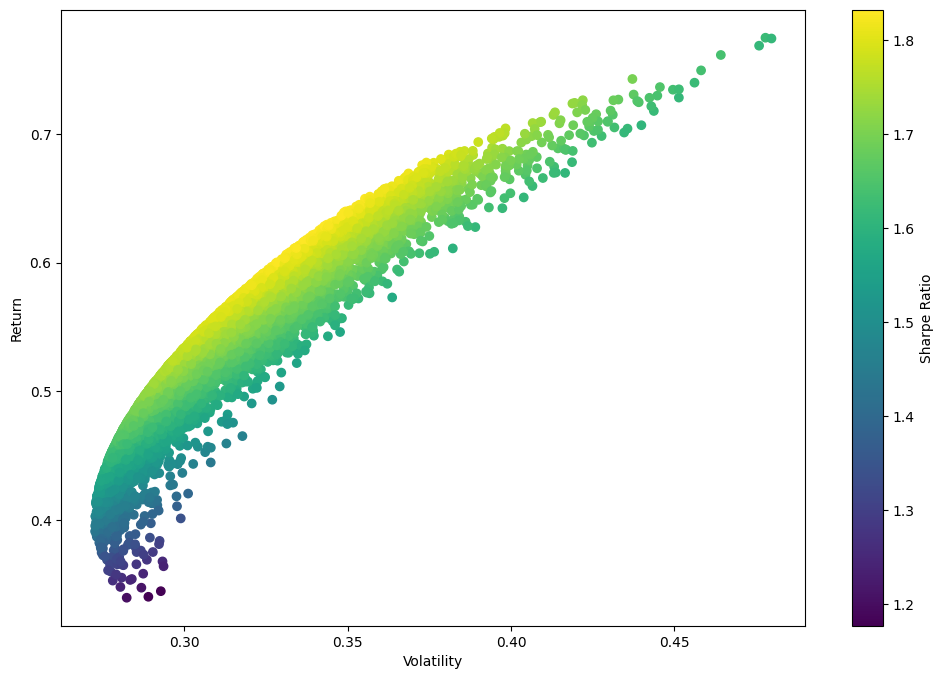

In [49]:
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap = 'viridis')

plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

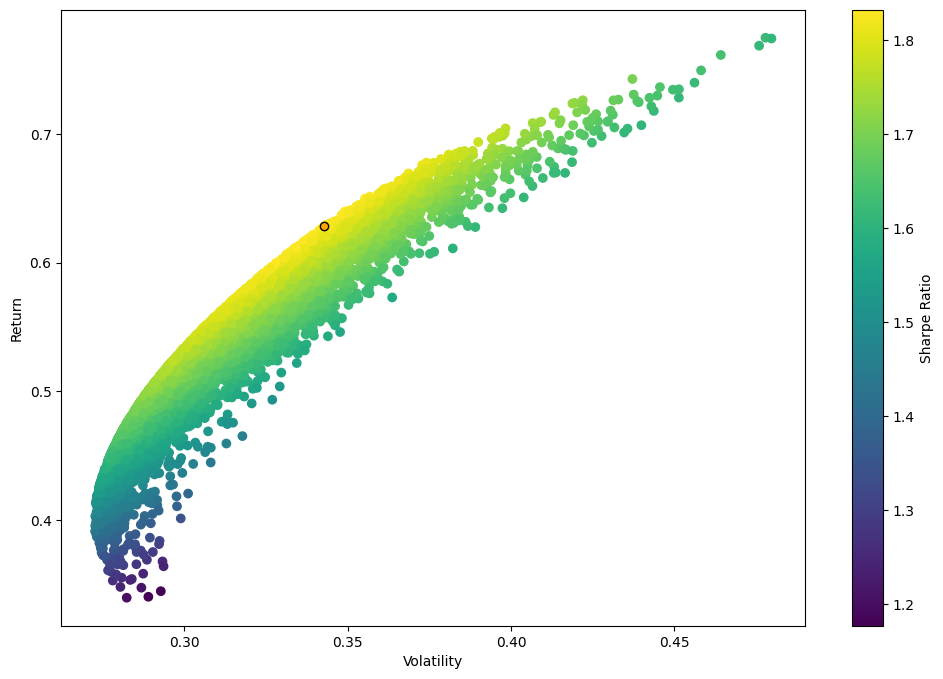

In [50]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap = 'viridis')

plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolor = 'black');